In [48]:
import os
from fnmatch import fnmatch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [51]:
def listfiles(root, pattern):
    for path, subdirs, files in os.walk(root):
        for name in files:
            if fnmatch(name, pattern):
                yield os.path.join(path, name)

In [40]:
dataDirectory = "../data/"
testsDirectory = "tests/"
testsCompletosDiretory = "tests/test_completos/"

**test1** 
mean:2.118263250083796e-07, median:1.5634059999380945e-07, var:1.3703456580891367e-14

diferencias (1ras 5)
 [[3.2279778e-07]
 [1.7449570e-07]
 [1.0838318e-07]
 [1.1018753e-07]
 [1.3818550e-07]]


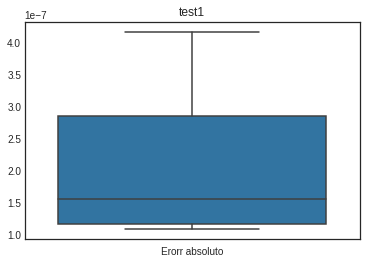

**test2** 
mean:2.599754333569108e-07, median:2.75063514992846e-07, var:1.2024715958479739e-14

diferencias (1ras 5)
 [[3.2995415e-07]
 [4.1978073e-07]
 [2.4007416e-07]
 [3.1005287e-07]
 [1.8009567e-07]]


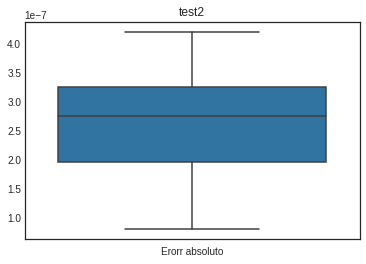

**test-prob-2** 
mean:1.7064062834970528e-07, median:1.3310146501632758e-07, var:1.6545625402116708e-14

diferencias (1ras 5)
 [[3.35700990e-07]
 [3.48636630e-07]
 [5.21240200e-08]
 [1.57007220e-07]
 [2.11792001e-08]]


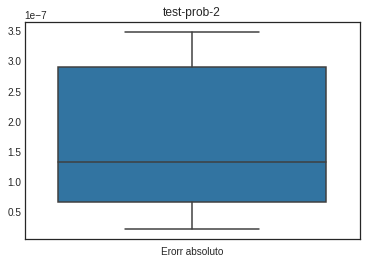

**test-prob-1** 
mean:3.3128293328947106e-07, median:3.084545149578677e-07, var:8.672803244347767e-15

diferencias (1ras 5)
 [[4.7758293e-07]
 [2.2181511e-07]
 [2.7203369e-07]
 [3.4487534e-07]
 [4.2205429e-07]]


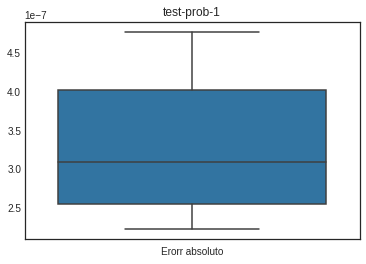

**test_completo_1000_2** 
mean:2.137821759678027e-05, median:1.1807379460049283e-05, var:5.101689303415971e-08

diferencias (1ras 5)
 [[3.21762583e-03]
 [1.42627987e-05]
 [9.18126631e-06]
 [1.22872447e-05]
 [1.42535214e-05]]


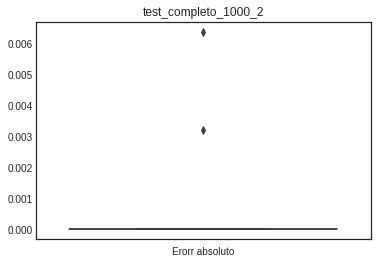

**test_completo_100_4** 
mean:0.0011523573354296974, median:0.00024142266194998596, var:4.147488442840873e-05

diferencias (1ras 5)
 [[0.05061235]
 [0.00013391]
 [0.00023582]
 [0.00013781]
 [0.00055581]]


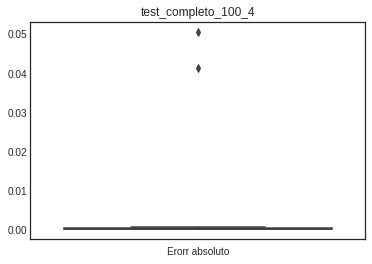

**test_completo_100_8** 
mean:0.0028381742101514108, median:0.0006044158999350124, var:0.00023882073883625652

diferencias (1ras 5)
 [[1.02622476e-01]
 [1.28147129e-04]
 [8.39334283e-05]
 [1.08838549e-04]
 [9.96424046e-04]]


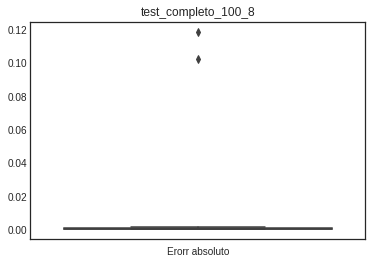

**test_completo_10_1** 
mean:0.05833333115861996, median:0.016666665963614963, var:0.007833333779322105

diferencias (1ras 5)
 [[0.15833333]
 [0.01666666]
 [0.01666699]
 [0.01666634]
 [0.01666667]]


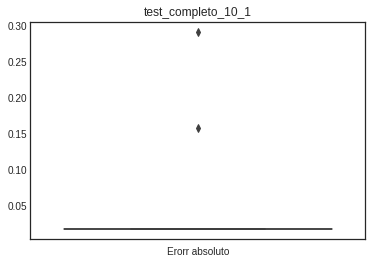

**test_completo_1000_8** 
mean:9.115774836087958e-05, median:7.553140970500971e-05, var:1.538871546451828e-07

diferencias (1ras 5)
 [[1.18879540e-02]
 [6.78671862e-05]
 [7.80191952e-05]
 [7.46491043e-05]
 [8.14665945e-05]]


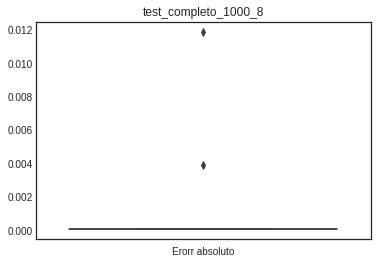

In [73]:
for path in [dataDirectory, testsDirectory]:
    for filename in listfiles(path, "*.in"):
        expected = pd.read_table(filename.replace(".in", ".expected"), names = ["expected"])
        output = pd.read_table(filename.replace(".in", ".out"), names = ["output"])
        
        data = pd.concat([expected, output], axis=1)
        dif = np.absolute(np.array(expected) - np.array(output))
        
        testname = filename.split("/")[-1].replace(".in", "")
        
        print(f"**{testname}** \nmean:{dif.mean()}, median:{np.median(dif)}, var:{dif.var()}")
        print("\ndiferencias (1ras 5)\n", dif[:5])
        
        sns.boxplot(y=dif)
        plt.title(testname)
        plt.xlabel("Error absoluto")
        plt.show()
        